In [14]:
from math import *
import numpy as np
import cv2
import matplotlib.pyplot as plt
from random import *
%matplotlib inline

In [15]:
def draw_sqare_nex(img, x1, y1, x2, y2):
    x_len = x2 - x1
    y_len = y2 - y1
    x1_len = x1 - x2
    y1_len = y1 - y2
    x4 = x1 + (x_len*cos(radians(90)) + y_len*sin(radians(90)))
    y4 = y1 + (x_len*sin(radians(90))*(-1) + y_len*cos(radians(90)))
    x3 = x2 + (x1_len*cos(radians(90)) - y1_len*sin(radians(90)))
    y3 = y2 + (x1_len*sin(radians(90)) + y1_len*cos(radians(90)))
    pts = np.array([[x1,y1],[x2,y2],[x3,y3],[x4,y4]], np.int32)
    pts = pts.reshape((-1,1,2))
    image = cv2.fillConvexPoly(img, pts, (randint(0,255),randint(0,255),randint(0,255)))
    return image, x4, y4, x3, y3

In [16]:
def tree_pi(image, x, y, x1, y1, side, alpha, deep):
    image, x3, y3, x2, y2 = draw_sqare_nex(image, x, y, x1, y1)
    new_side = side * cos(alpha)
    ros_side = new_side / side
    x_len = x2 - x3
    y_len = y2 - y3
    x4 = x3 + (x_len*cos(alpha) + y_len*sin(alpha))*ros_side
    y4 = y3 + (x_len*sin(alpha)*(-1) + y_len*cos(alpha))*ros_side
    if deep > 1:
        tree_pi(image, x3, y3, x4, y4, new_side, alpha, deep-1)
        tree_pi(image, x4, y4, x2, y2, side * sin(alpha), alpha, deep-1)

In [17]:
print("Введите угол: ")
ugol = int(input())
print("Введите глубину: ")
glub = int(input())
print("Введите размер стороны: ")
storona = int(input())
start = (storona * 10 / 2 - storona / 2, storona * 10)

Введите угол: 
30
Введите глубину: 
9
Введите размер стороны: 
100


In [21]:
img = np.zeros((storona*10,storona*10,3), np.int32)

In [22]:
#tree(img, start[0], start[1], storona, radians(90), radians(ugol),glub )

In [23]:
tree_pi(img, start[0], start[1], (start[0] + storona), start[1], storona, radians(ugol), glub)

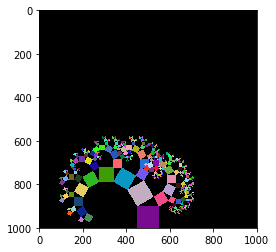

In [24]:
plt.imshow(img)

In [8]:
plt.imsave("tree.png",img)